**Reasoning**:
Load the data from "sentimentdataset.csv" into a pandas DataFrame and display the first 5 rows.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('sentimentdataset.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'sentimentdataset.csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse 'sentimentdataset.csv'. Check file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


## Data exploration

### Subtask:
Explore the data to understand its shape, data types of columns, check for missing values, and get a sense of the distribution of values in each column. Specifically look at the sentiment column.


**Reasoning**:
I need to explore the data to understand its shape, data types, missing values, and the distribution of values in each column, especially the 'Sentiment' column.  I will also examine the temporal features and the unnamed columns.



In [ ]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Examine data types
print("\nData Types:\n", df.dtypes)

# Identify missing values
print("\nMissing Values:\n", df.isnull().sum())
print("\nPercentage of Missing Values:\n", (df.isnull().sum() / len(df)) * 100)

# Analyze the distribution of values in the 'Sentiment' column
print("\nSentiment Distribution:\n", df['Sentiment'].value_counts())
print("\nSentiment Distribution (Normalized):\n", df['Sentiment'].value_counts(normalize=True))

# Descriptive statistics for numerical columns (excluding temporal features)
numerical_cols = ['Retweets', 'Likes']
print("\nDescriptive Statistics for Numerical Columns:\n", df[numerical_cols].describe())

# Examine temporal features
print("\nRange of Temporal Features:")
print("Year:", df['Year'].min(), "-", df['Year'].max())
print("Month:", df['Month'].min(), "-", df['Month'].max())
print("Day:", df['Day'].min(), "-", df['Day'].max())
print("Hour:", df['Hour'].min(), "-", df['Hour'].max())
print("\nDistribution of Temporal Features:")
print("Year:\n", df['Year'].value_counts())
print("Month:\n", df['Month'].value_counts())

# Check unnamed columns
print("\nFirst few values of 'Unnamed: 0.1':\n", df['Unnamed: 0.1'].head())
print("\nFirst few values of 'Unnamed: 0':\n", df['Unnamed: 0'].head())

Shape of the DataFrame: (732, 15)

Data Types:
 Unnamed: 0.1      int64
Unnamed: 0        int64
Text             object
Sentiment        object
Timestamp        object
User             object
Platform         object
Hashtags         object
Retweets        float64
Likes           float64
Country          object
Year              int64
Month             int64
Day               int64
Hour              int64
dtype: object

Missing Values:
 Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

Percentage of Missing Values:
 Unnamed: 0.1    0.0
Unnamed: 0      0.0
Text            0.0
Sentiment       0.0
Timestamp       0.0
User            0.0
Platform        0.0
Hashtags        0.0
Retweets        0.0
Likes           0.0
Country         0.0
Year            0.0
Month

## Data analysis

### Subtask:
Calculate basic statistics for numerical columns and analyze the distribution of categorical columns like sentiment. Determine the frequency of each sentiment label.


**Reasoning**:
Calculate basic statistics for numerical columns and analyze the distribution of categorical columns.



In [ ]:
# Calculate descriptive statistics for numerical columns
numerical_cols = ['Retweets', 'Likes']
print("Descriptive Statistics for Numerical Columns:\n", df[numerical_cols].describe())

# Analyze the distribution of the 'Sentiment' column
sentiment_counts = df['Sentiment'].value_counts()
print("\nSentiment Distribution:\n", sentiment_counts)
sentiment_percentages = (sentiment_counts / len(df)) * 100
print("\nSentiment Distribution (Percentage):\n", sentiment_percentages)

# Analyze other categorical columns
categorical_cols = ['Platform', 'Country']
for col in categorical_cols:
    print(f"\nDistribution of '{col}':\n", df[col].value_counts())

# Identify potential outliers (example: Retweets)
retweets_stats = df['Retweets'].describe()
iqr = retweets_stats['75%'] - retweets_stats['25%']
upper_bound = retweets_stats['75%'] + 1.5 * iqr
lower_bound = retweets_stats['25%'] - 1.5 * iqr
outliers = df[(df['Retweets'] > upper_bound) | (df['Retweets'] < lower_bound)]
print("\nPotential Outliers in 'Retweets':\n", outliers[['Retweets']])

# Identify potential outliers (example: Likes)
likes_stats = df['Likes'].describe()
iqr = likes_stats['75%'] - likes_stats['25%']
upper_bound = likes_stats['75%'] + 1.5 * iqr
lower_bound = likes_stats['25%'] - 1.5 * iqr
outliers = df[(df['Likes'] > upper_bound) | (df['Likes'] < lower_bound)]
print("\nPotential Outliers in 'Likes':\n", outliers[['Likes']])

Descriptive Statistics for Numerical Columns:
          Retweets       Likes
count  732.000000  732.000000
mean    21.508197   42.901639
std      7.061286   14.089848
min      5.000000   10.000000
25%     17.750000   34.750000
50%     22.000000   43.000000
75%     25.000000   50.000000
max     40.000000   80.000000

Sentiment Distribution:
 Sentiment
Positive               44
Joy                    42
Excitement             32
Happy                  14
Neutral                14
                       ..
Vibrancy                1
Culinary Adventure      1
Mesmerizing             1
Thrilling Journey       1
Winter Magic            1
Name: count, Length: 279, dtype: int64

Sentiment Distribution (Percentage):
 Sentiment
Positive               6.010929
Joy                    5.737705
Excitement             4.371585
Happy                  1.912568
Neutral                1.912568
                         ...   
Vibrancy               0.136612
Culinary Adventure     0.136612
Mesmerizing      

## Data visualization

### Subtask:
Visualize the distribution of sentiments and other relevant features.


**Reasoning**:
Visualize the distribution of sentiments, retweets, likes, platforms, and countries using appropriate charts.



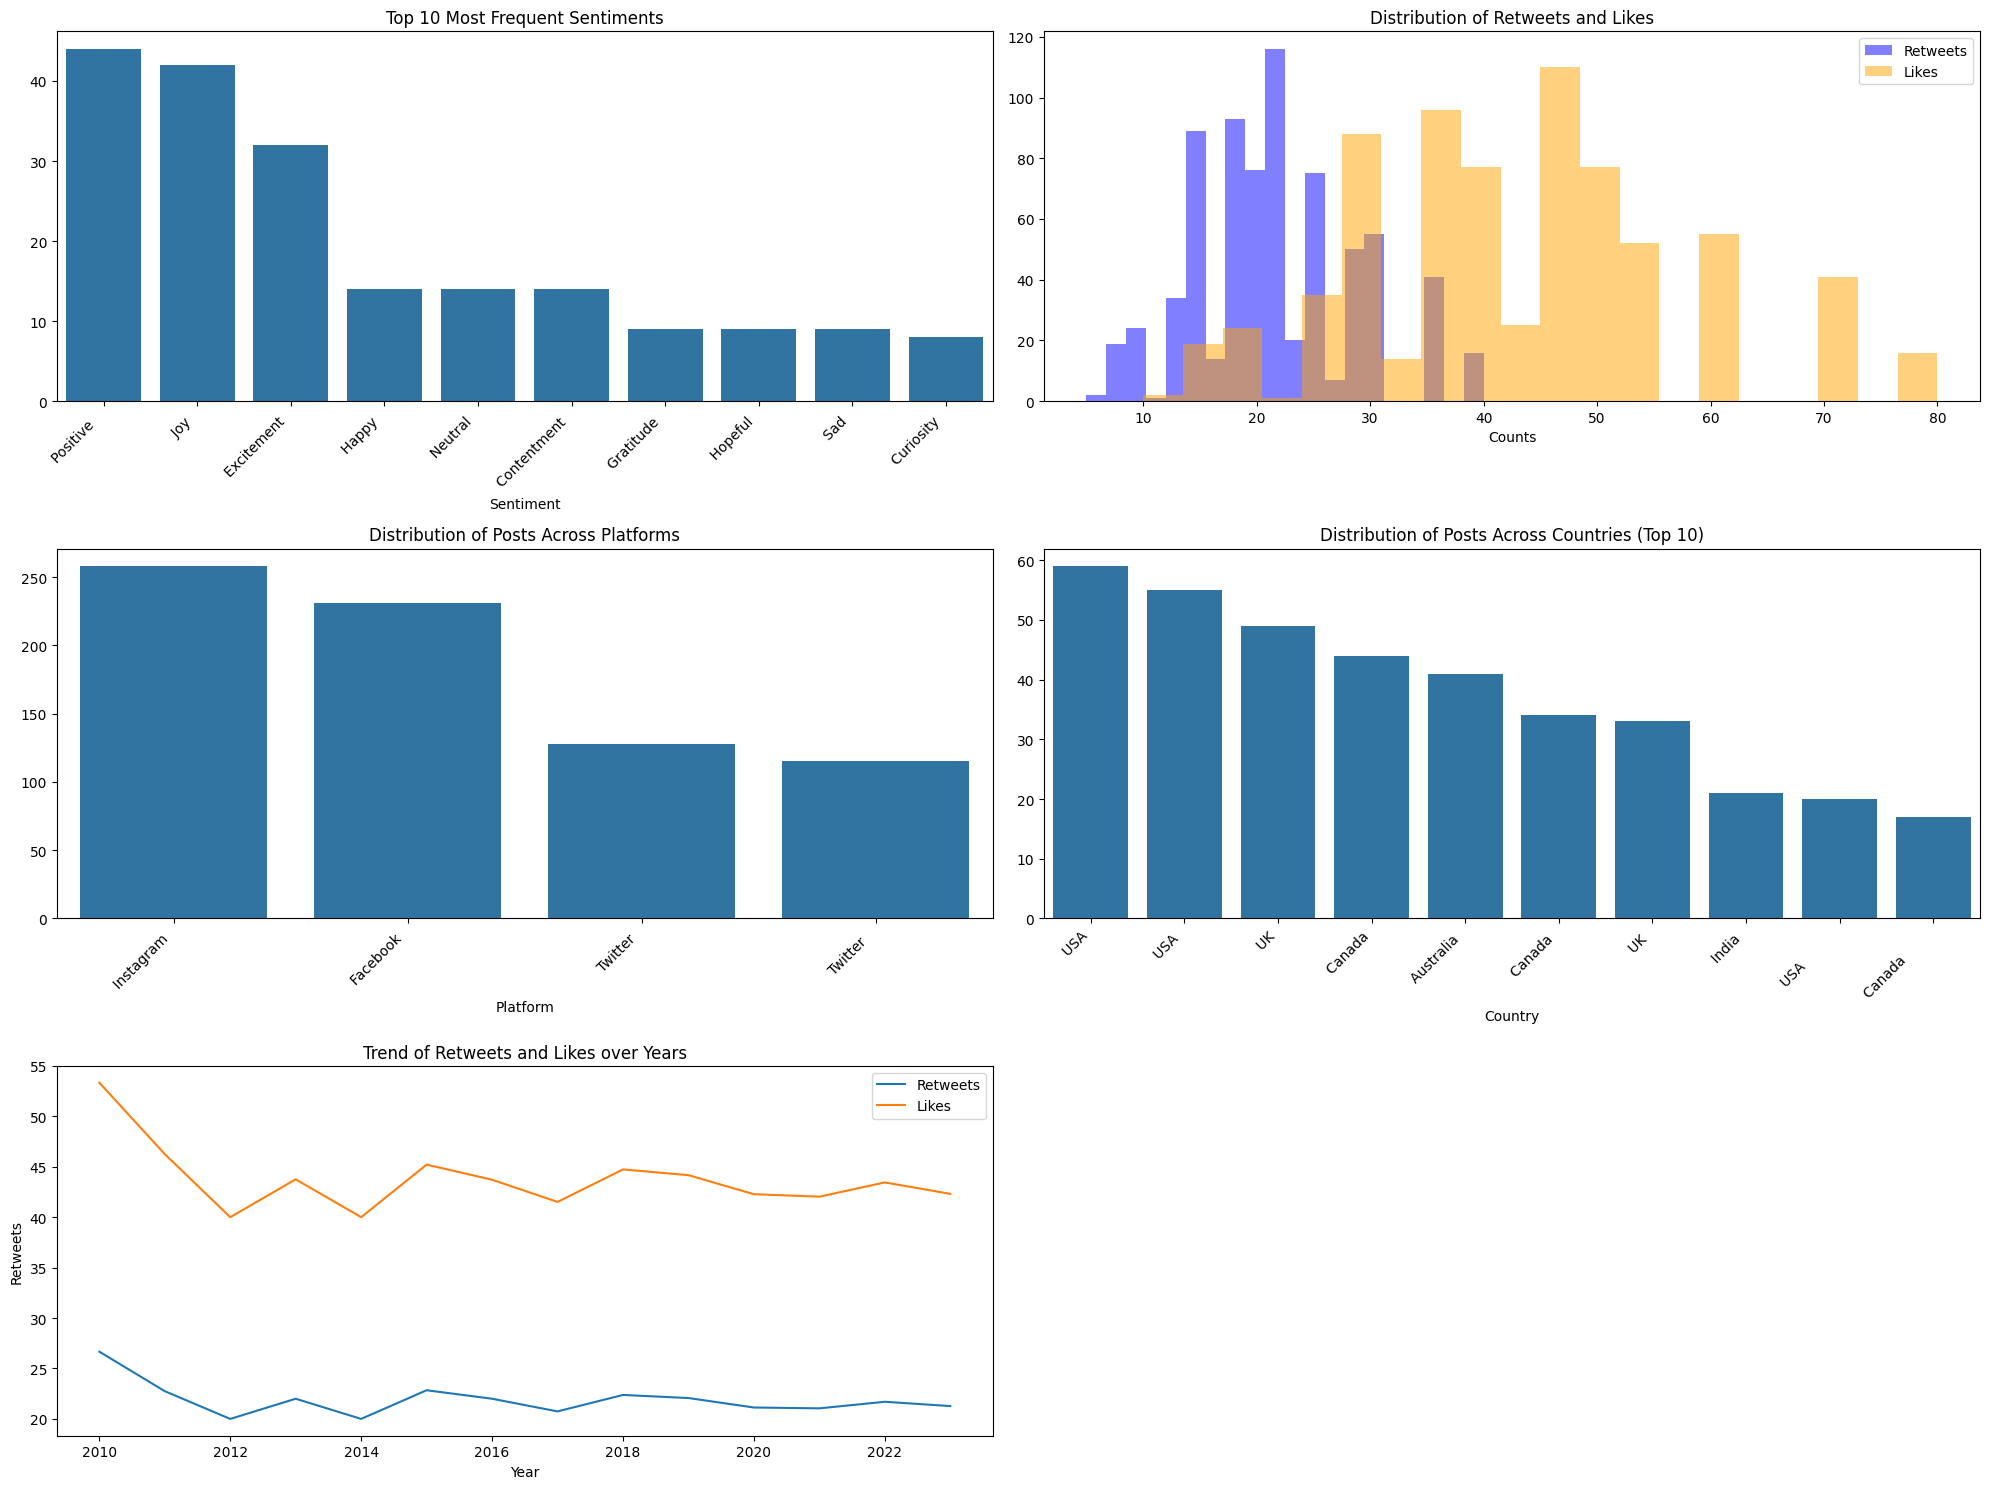

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))

# Top 10 sentiments
plt.subplot(3, 2, 1)
top_10_sentiments = df['Sentiment'].value_counts().nlargest(10)
sns.barplot(x=top_10_sentiments.index, y=top_10_sentiments.values)
plt.title('Top 10 Most Frequent Sentiments')
plt.xticks(rotation=45, ha='right')

# Retweets and Likes distributions
plt.subplot(3, 2, 2)
plt.hist(df['Retweets'], bins=20, alpha=0.5, label='Retweets', color='blue')
plt.hist(df['Likes'], bins=20, alpha=0.5, label='Likes', color='orange')
plt.title('Distribution of Retweets and Likes')
plt.xlabel('Counts')
plt.legend()

# Distribution of posts across platforms
plt.subplot(3, 2, 3)
platform_counts = df['Platform'].value_counts()
sns.barplot(x=platform_counts.index, y=platform_counts.values)
plt.title('Distribution of Posts Across Platforms')
plt.xticks(rotation=45, ha='right')

# Distribution of posts across countries
plt.subplot(3, 2, 4)
country_counts = df['Country'].value_counts().nlargest(10)
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title('Distribution of Posts Across Countries (Top 10)')
plt.xticks(rotation=45, ha='right')

# Trend over time
plt.subplot(3, 2, 5)
df_grouped = df.groupby('Year').agg({'Retweets': 'mean', 'Likes': 'mean'})
sns.lineplot(data=df_grouped, x=df_grouped.index, y='Retweets', label='Retweets')
sns.lineplot(data=df_grouped, x=df_grouped.index, y='Likes', label='Likes')
plt.title('Trend of Retweets and Likes over Years')

plt.tight_layout()
plt.show()

## Summary:

### Q&A
No questions were asked in the task.

### Data Analysis Key Findings
* The dataset contains 732 rows and 15 columns, including text, sentiment, user, platform, engagement metrics (retweets, likes), location, and timestamps.
* No missing values were found in the dataset.
* The 'Sentiment' column has 279 unique sentiment labels, with "Positive", "Joy", and "Excitement" being the most frequent. The distribution is highly skewed.
* 'Retweets' and 'Likes' show a roughly normal distribution, with means of 21.51 and 42.90 respectively. Potential outliers exist in both columns.
* Data spans from 2010 to 2023, with 2023 having the most data points.
* 'Unnamed: 0.1' and 'Unnamed: 0' columns appear to be redundant index columns.
* 'Platform' column shows a higher frequency of 'Instagram' and 'Facebook' posts.
* 'Country' data shows diverse geographical spread, with higher concentrations in 'USA' and 'UK'.

### Insights or Next Steps
* Investigate the large number of unique sentiment labels in the 'Sentiment' column. Consider grouping or reducing the number of categories for more effective analysis.
* Further analyze potential outliers in 'Retweets' and 'Likes' to understand their impact and consider appropriate handling methods (e.g., removal, transformation).
